<a href="https://colab.research.google.com/github/Hermannandhermione/CiYun/blob/main/zhushan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re

# ==========================================
# 1. 你的原始文本 (可以直接替换成 open().read())
# ==========================================
raw_text = """
賀新郎〈秋曉〉
　　𣺌𣺌啼鴉了亘魚天寒生峭嶼五湖秋曉竹几一鐙人做夢嘶馬誰行古道起搔首窺星多少月有微黄籬無影挂牽牛數朶青花小秋太淡添紅棗　愁痕倚賴西風埽被西風翻催鬢鬒與秋俱老舊院隔霜簾不捲金粉屏邊醉倒計無此中年懷抱萬里江南吹簫恨恨參差白雁横天杪煙未歛楚山杳
　　又〈約友三月旦飲〉
　　雁嶼晴嵐薄倚層屏千樹髙低粉纖紅弱雲隘東風藏不盡吹豔生香萬壑又散入汀蘅洲葯擾擾囱囱塵土面看歌鸎舞燕逢春樂人共物知誰錯　寳釵樓上圍簾幙小嬋娟雙調彈箏半霄鸞鶮我輩中人無此分琴思詩情當却也勝似愁横眉角芳景三分才過二便綠隂門巷楊花落沽斗酒且同酌
　　又〈吳江〉
　　浪湧孤亭起是當年蓬萊頂上海風飄墜帝遣江神長守䕶八柱蛟龍纒尾鬬吐出寒煙寒雨昨夜鯨翻神軸動巻雕翬擲向虚空裏但留得絳虹住　五湖有客扁舟艤怕羣仙重游到此翠旌難駐手拍䦨干呼白鷺為我慇勤寄語奈鷺也驚飛沙渚星月一天雲萬壑覽茫茫宇宙知何處鼓雙楫浩歌去
"""

# ==========================================
# 2. 转换函数
# ==========================================
def parse_zhushan_indented(text):
    data = []

    # 按行切割，移除两端空白（但不移除中间的空格，因为我们需要判断缩进）
    lines = text.split('\n')

    last_cipai = "未知词牌"
    current_cipai = ""
    current_title = ""
    current_content = []

    # 正则解释：
    # ^\s* : 匹配行首任意数量的空白（包括全角空格）
    # (.*?)  : 捕获组1 - 词牌名（非贪婪）
    # 〈     : 匹配全角左尖括号
    # (.*?)  : 捕获组2 - 题目
    # 〉     : 匹配全角右尖括号
    header_pattern = re.compile(r"^\s*(.*?)〈(.*?)〉")

    for line in lines:
        stripped_line = line.strip() # 去掉首尾空白用于判断是否空行
        if not stripped_line:
            continue

        match = header_pattern.match(line)

        if match:
            # === A. 发现新标题 ===
            # 先保存上一首（如果有的话）
            if current_content:
                data.append({
                    "cipai": current_cipai,
                    "title": current_title,
                    "content": "".join(current_content)
                })
                current_content = []

            # 提取词牌和题目
            raw_cipai = match.group(1).strip()
            raw_title = match.group(2).strip()

            # 处理“又”字继承逻辑
            # 注意：原始文本可能有缩进，raw_cipai 可能会抓到空格，strip() 很重要
            if "又" in raw_cipai:
                current_cipai = last_cipai
            else:
                current_cipai = raw_cipai
                last_cipai = raw_cipai

            current_title = raw_title

        else:
            # === B. 发现正文 ===
            # 清洗正文：移除全角空格(　)和普通空格
            # 你的文本中，句中有一个全角空格表示换阙，做词云时通常直接连起来即可
            clean_content = stripped_line.replace("　", "").replace(" ", "")
            current_content.append(clean_content)

    # === C. 保存最后一首 ===
    if current_content:
        data.append({
            "cipai": current_cipai,
            "title": current_title,
            "content": "".join(current_content)
        })

    return pd.DataFrame(data)

# ==========================================
# 3. 执行并输出
# ==========================================

# 实际使用时，请用下面这行读取你的txt文件：
# with open('你的文件.txt', 'r', encoding='utf-8') as f: raw_text = f.read()

# 1. 定义文件路径（注意要加引号！）
file_path = '/content/sample_data/raw_text.txt'

# 2. 读取文件内容到变量 text_content 中
with open(file_path, 'r', encoding='utf-8') as f:
    text_content = f.read()

# 3. 把读取到的【内容】传给函数，而不是路径
df = parse_zhushan_indented(text_content)

# 生成用于分析的完整文本列
df['full_text'] = df['cipai'] + " " + df['title'] + " " + df['content']

print("转换成功！数据预览：")
print(df[['cipai', 'title', 'content']].to_string())

# 保存为Excel，可以直接拿去分类了
df.to_excel("/content/sample_data/竹山词_清洗版.xlsx", index=False)

转换成功！数据预览：
    cipai                                title                                                                                                                                                                                                                                                                                            content
0     賀新郎                                   秋曉                                                                                                                                                                               𣺌𣺌啼鴉了亘魚天寒生峭嶼五湖秋曉竹几一鐙人做夢嘶馬誰行古道起搔首窺星多少月有微黄籬無影挂牽牛數朶青花小秋太淡添紅棗愁痕倚賴西風埽被西風翻催鬢鬒與秋俱老舊院隔霜簾不捲金粉屏邊醉倒計無此中年懷抱萬里江南吹簫恨恨參差白雁横天杪煙未歛楚山杳
1     賀新郎                               約友三月旦飲                                                                                                                                                                               雁嶼晴嵐薄倚層屏千樹髙低粉纖紅弱雲隘東風藏不盡吹豔生香萬壑又散入汀蘅洲葯擾擾囱囱塵土面看歌鸎舞燕逢春樂人共物知誰錯寳釵樓上圍簾幙小嬋娟雙調彈箏半霄鸞鶮我輩中人無此分琴思詩情當却也勝似愁

In [ ]:
import jiayan
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# ==========================================
# 1. 准备停用词表 (Stop Words)
# ==========================================
# 这是词云质量的关键！必须剔除没有实际意义的虚词。
stop_words = set([
    # 标点
    "，", "。", "？", "！", "、", "；", "：", "·", "〈", "〉", "《", "》", "\n", " ", "　",
    # 常见古文虚词
    "之", "乎", "者", "也", "兮", "焉", "矣", "哉", "夫", "盖", "耳",
    "于", "与", "以", "而", "则", "乃", "若", "且", "为", "所", "因",
    # 常见无实义动词/代词/量词
    "不", "无", "有", "去", "来", "看", "见", "作", "似", "如", "是", "在",
    "这", "那", "甚", "个", "些", "处", "里", "边", "度", "许", "般",
    "我", "吾", "人", "谁", "何", "几", "怎", "却", "便", "总", "还", "正",
    "一", "二", "三", "十", "千", "万" # 数字有时也是噪音，看你是否想保留
])

# ==========================================
# 2. 加载分词模型 & 处理文本
# ==========================================
print("正在加载 Jiayan 模型...")
lm = jiayan.load_lm('jiayan.klm')
segmenter = jiayan.CharHMMTokenizer(lm)

# 将 DataFrame 中的所有文本合并成一个长字符串
# 这里我们将 词牌、题目、内容 全部加进去，因为词牌和题目也包含重要信息
all_text_content = " ".join(df['full_text'].tolist())

# 正则清洗：只保留汉字
clean_content = re.sub(r"[^\u4e00-\u9fa5]", "", all_text_content)

# 开始分词
print("正在分词...")
words = segmenter.tokenize(clean_content)

# 过滤停用词
final_words = []
for w in words:
    # 逻辑：不在停用词表中，且长度大于0
    # 技巧：蒋捷词中“梦”、“舟”、“雨”这种单字意象极重要，所以保留单字
    if w not in stop_words and len(w.strip()) >= 1:
        final_words.append(w)

# 统计词频 (为了生成词云更精准)
word_counts = Counter(final_words)

# 打印前20个高频词看看（这一步就是简单的文本挖掘）
print("\n【蒋捷全集】Top 20 高频词：")
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}")

# ==========================================
# 3. 绘制全集词云
# ==========================================
print("\n正在绘制词云...")

# 设置字体路径 (请根据你的电脑修改!!)
# Windows 示例: r"C:\Windows\Fonts\simhei.ttf" (黑体) 或 r"C:\Windows\Fonts\msyh.ttc" (微软雅黑)
# Mac 示例: "/System/Library/Fonts/PingFang.ttc"
font_path = r"/content/sample_data/京華老宋体v3.0.ttf"

wc = WordCloud(
    font_path=font_path,
    width=1000,
    height=800,
    background_color='white', #不仅省墨，且更符合学术展示规范
    max_words=150,            # 显示前150个词
    max_font_size=200,        # 最大字号
    random_state=42,          # 固定随机种子，保证每次运行图形状一样
    colormap='teal'           # 色系：teal(蓝绿色)很符合"竹山"的清冷感
    # 其他推荐色系: 'ocean', 'Blues', 'GnBu'
).generate_from_frequencies(word_counts)

# 显示图片
plt.figure(figsize=(12, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off") # 不显示坐标轴
plt.title("蒋捷（竹山）词全集词云", fontsize=20, pad=20)
plt.show()

# 如果想保存图片
# wc.to_file("zhushan_full_cloud.png")

正在加载 Jiayan 模型...


OSError: Cannot read model 'jiayan.klm' (util/file.cc:76 in int util::OpenReadOrThrow(const char*) threw ErrnoException because `-1 == (ret = open(name, 00))'. No such file or directory while opening /content/jiayan.klm)

In [ ]:
!pip install jiayan
!pip install https://github.com/kpu/kenlm/archive/master.zip

  Using cached https://github.com/kpu/kenlm/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install opencc-python-reimplemented pandas jiayan wordcloud matplotlib

✅ 成功读取 Excel，共 96 首词。
预览前5首待分析内容（无标题）：
0    𣺌𣺌啼鴉了亘魚天寒生峭嶼五湖秋曉竹几一鐙人做夢嘶馬誰行古道起搔首窺星多少月有微黄籬無影挂牽牛...
1    雁嶼晴嵐薄倚層屏千樹髙低粉纖紅弱雲隘東風藏不盡吹豔生香萬壑又散入汀蘅洲葯擾擾囱囱塵土面看歌鸎...
2    浪湧孤亭起是當年蓬萊頂上海風飄墜帝遣江神長守䕶八柱蛟龍纒尾鬬吐出寒煙寒雨昨夜鯨翻神軸動巻雕翬...
3    夢冷黄金屋嘆秦箏斜鴻陣裏素絃塵撲化作嬌鸎飛歸去猶認紗窗舊綠正過雨荆桃如菽此恨難平君知否似瓊臺...
4    深閣簾垂繡記家人軟語燈邊笑渦紅透萬叠城頭哀怨角吹落霜花滿袖影厮伴東奔西走望斷鄉闗知何處羨寒鴉...
Name: text_for_analysis, dtype: object

正在繁简转换 (OpenCC)...
正在加载甲言模型...
正在分词...
分词结束。共统计到 2773 个独立词汇。
正在加权 (双字权重 x2.2)...
【Top 10 加权后高分词】: [('花', 39), ('云', 38), ('小', 32), ('又', 31), ('春', 29), ('此', 28), ('红', 28), ('梅花', 26.400000000000002), ('东风', 24.200000000000003), ('栁', 24)]

正在绘图...


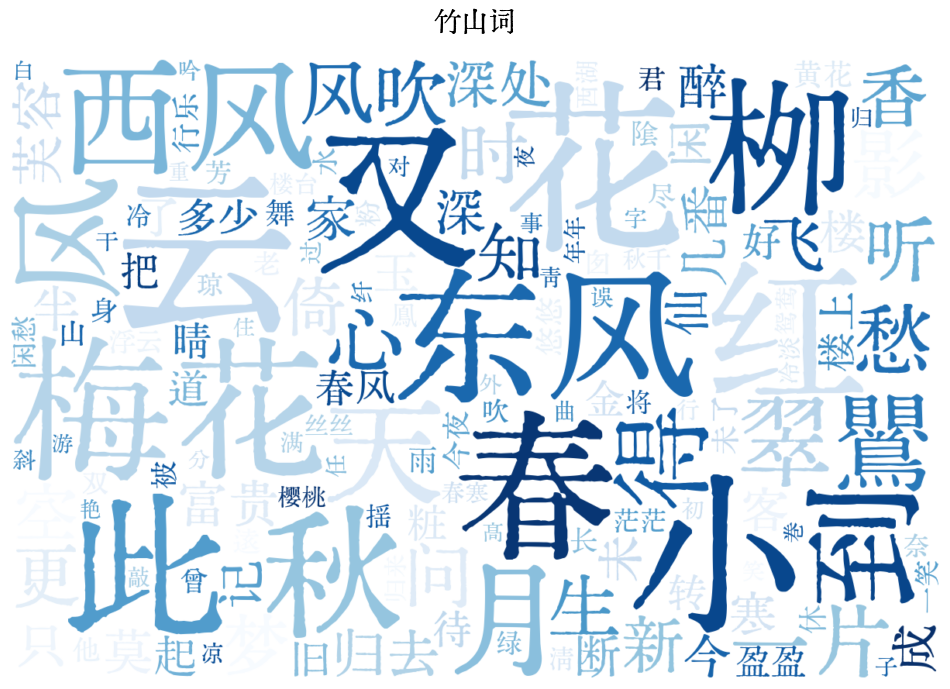

In [24]:
import pandas as pd
import jiayan
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from opencc import OpenCC
import os
from matplotlib.font_manager import FontProperties

# ==========================================
# 0. 参数配置
# ==========================================
# 请确保这些路径下有对应的文件
font_path = "/content/drive/MyDrive/Colab_Notebooks/zhushan/song.ttf"  # 字体路径
file_path = '/content/drive/MyDrive/Colab_Notebooks/zhushan/zhushan.xlsx' # Excel路径
model_path = '/content/drive/MyDrive/Colab_Notebooks/zhushan/jiayan.klm' # 模型路径

# 双字词加权倍数 (8倍意味着双字词更容易变大)
MULTI_CHAR_BOOST = 2.2

# 设置字体对象 (解决Matplotlib标题乱码)
if not os.path.exists(font_path):
    print(f"⚠️ 警告：找不到字体 {font_path}，请确认路径！")
    # font_path = "SimHei.ttf" # 备用方案
my_font = FontProperties(fname=font_path, size=20)

# ==========================================
# 1. 读取数据 (关键修改在这里)
# ==========================================
if not os.path.exists(file_path):
    print(f"❌ 找不到 Excel 文件: {file_path}")
else:
    df = pd.read_excel(file_path, keep_default_na=False)
    print(f"✅ 成功读取 Excel，共 {len(df)} 首词。")

    # === 【关键修改】只取 content 列，不包含 cipai 和 title ===
    # .astype(str) 是为了防止有空的单元格报错
    df['text_for_analysis'] = df['content'].astype(str)

    print("预览前5首待分析内容（无标题）：")
    print(df['text_for_analysis'].head())

    # ==========================================
    # 2. 繁体转简体 (OpenCC)
    # ==========================================
    print("\n正在繁简转换 (OpenCC)...")
    cc = OpenCC('t2s')
    # 对纯内容列进行转换
    df['simp_text'] = df['text_for_analysis'].apply(lambda x: cc.convert(x))

    # ==========================================
    # 3. 加载甲言模型 & 分词
    # ==========================================
    if not os.path.exists(model_path):
        print(f"❌ 找不到分词模型 {model_path}，请先下载！")
    else:
        print("正在加载甲言模型...")
        lm = jiayan.load_lm(model_path)
        segmenter = jiayan.CharHMMTokenizer(lm)

        # 停用词表
        stop_words = set([
            "，", "。", "？", "！", "、", "；", "：", "·", "〈", "〉", "《", "》", "\n", " ", "　",
            "之", "乎", "者", "也", "兮", "焉", "矣", "哉", "夫", "盖", "耳", "其",
            "于", "与", "以", "而", "则", "乃", "若", "且", "为", "所", "因",
            "不", "无", "有", "去", "来", "看", "见", "作", "似", "如", "是", "在",
            "这", "那", "甚", "个", "些", "处", "里", "边", "度", "许", "般", "向", "但",
            "我", "吾", "人", "谁", "何", "几", "怎", "却", "便", "总", "还", "正", "自",
            "一", "二", "三", "十", "千", "万", "上", "中", "下", "后", "前", "日"
        ])

        print("正在分词...")

        # 将所有简体文本拼接
        full_content_str = " ".join(df['simp_text'].tolist())

        # 再次清洗（只留汉字）
        clean_content = re.sub(r"[^\u4e00-\u9fa5]", "", full_content_str)

        # 甲言分词
        words = segmenter.tokenize(clean_content)

        # 收集有效词汇
        all_tokens = []
        for w in words:
            w = w.strip()
            if w not in stop_words and len(w) >= 1:
                all_tokens.append(w)

        # 统计原始词频
        raw_counts = Counter(all_tokens)
        print(f"分词结束。共统计到 {len(raw_counts)} 个独立词汇。")

        # ==========================================
        # 4. 加权计算 (单字 vs 双字)
        # ==========================================
        print(f"正在加权 (双字权重 x{MULTI_CHAR_BOOST})...")

        weighted_scores = {}
        for word, count in raw_counts.items():
            if len(word) > 1:
                weighted_scores[word] = count * MULTI_CHAR_BOOST
            else:
                weighted_scores[word] = count

        # 打印 Top 10 看看效果
        print("【Top 10 加权后高分词】:", sorted(weighted_scores.items(), key=lambda x:x[1], reverse=True)[:10])

        # ==========================================
        # 5. 绘制词云
        # ==========================================
        if weighted_scores:
            print("\n正在绘图...")
            wc = WordCloud(
                font_path=font_path,
                width=1200,
                height=800,
                background_color='white',
                max_words=150,
                max_font_size=250,
                random_state=42,
                colormap='Blues_r'
            ).generate_from_frequencies(weighted_scores)

            plt.figure(figsize=(12, 10))
            plt.imshow(wc, interpolation="bilinear")
            plt.axis("off")
            plt.title("竹山词", fontproperties=my_font, pad=20)
            plt.show()
        else:
            print("❌ 错误：结果为空，无法绘图。")

In [7]:
!pip install jiayan
!pip install https://github.com/kpu/kenlm/archive/master.zip
!pip install opencc

  Using cached https://github.com/kpu/kenlm/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import os
import shutil

# 1. 挂载云端硬盘
# 运行后会弹出一个窗口，点击允许即可
drive.mount('/content/drive')

# 2. 复制文件到 Colab 当前工作目录
# 假设你把文件直接上传到了 Drive 的根目录
source_path = '/content/drive/MyDrive/Colab Notebooks/jiayan.klm'
target_path = '/content/jiayan.klm'

if os.path.exists(source_path):
    print("✅ 在 Drive 中找到了文件，正在复制到当前环境...")
    shutil.copy(source_path, target_path)
    print("✅ 复制成功！现在可以直接加载模型了。")
else:
    print(f"❌ 未找到文件：{source_path}")
    print("请确认你已经把 jiayan.klm 上传到了 Google Drive 的根目录！")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 在 Drive 中找到了文件，正在复制到当前环境...
✅ 复制成功！现在可以直接加载模型了。


In [ ]:
import pandas as pd
import jiayan
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from collections import Counter
from opencc import OpenCC
import os

# ==========================================
# 1. 读取数据
# ==========================================
if not os.path.exists('/content/drive/MyDrive/Colab_Notebooks/zhushan/zhushan.xlsx'):
    print("❌ 找不到 zhushan_final.xlsx")
else:
    df = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/zhushan/zhushan.xlsx', keep_default_na=False)
    if 'full_text' not in df.columns:
        df['full_text'] = df['cipai'].astype(str) + " " + df['title'].astype(str) + " " + df['content'].astype(str)
    print(f"✅ 数据加载完毕，共 {len(df)} 首。")

# ==========================================
# 2. 加载模型 & 准备 OpenCC
# ==========================================
print("正在初始化...")
# 加载甲言
lm = jiayan.load_lm('jiayan.klm')
segmenter = jiayan.CharHMMTokenizer(lm)

# 准备两个转换器
cc_to_trad = OpenCC('s2t') # 简体转繁体 (确保输入给甲言的是繁体)
cc_to_simp = OpenCC('t2s') # 繁体转简体 (确保输出给人看的是简体)

# ==========================================
# 3. 停用词表 (用简体，因为我们最后会转成简体过滤)
# ==========================================
stop_words = set([
    "，", "。", "？", "！", "、", "；", "：", "·", "〈", "〉", "《", "》", "\n", " ", "　",
    "之", "乎", "者", "也", "兮", "焉", "矣", "哉", "夫", "盖", "耳", "其",
    "于", "与", "以", "而", "则", "乃", "若", "且", "为", "所", "因",
    "不", "无", "有", "去", "来", "看", "见", "作", "似", "如", "是", "在",
    "这", "那", "甚", "个", "些", "处", "里", "边", "度", "许", "般", "向", "但",
    "我", "吾", "人", "谁", "何", "几", "怎", "却", "便", "总", "还", "正", "自",
    "一", "二", "三", "十", "千", "万", "上", "中", "下", "后", "前", "日"
])

# ==========================================
# 4. 核心逻辑：繁体分词 -> 简体转换
# ==========================================
print("正在处理：转繁体 -> 分词 -> 转简体...")

final_words_list = []

for text in df['full_text'].tolist():
    # 1. 清洗并转为繁体 (Jiayan 喜欢繁体!)
    clean_text = re.sub(r"[^\u4e00-\u9fa5]", "", text)
    trad_text = cc_to_trad.convert(clean_text)

    # 2. 甲言分词 (此时得到的是繁体词列表，如 ['少年', '聽雨', '歌樓', '上'])
    words_trad = segmenter.tokenize(trad_text)

    # 3. 遍历分好的词，转回简体，并过滤
    for w_trad in words_trad:
        w_simp = cc_to_simp.convert(w_trad) # 单个词转简体

        # 过滤停用词 + 剔除单字 (如果你想看双字词，保留 len>=2)
        # 这里我设置 len>=1，如果你不想看单字（如“雨”），改成 len(w_simp) > 1
        if w_simp not in stop_words and len(w_simp) >= 1:
            final_words_list.append(w_simp)

# 统计
word_counts = Counter(final_words_list)
print("\n【修正后 Top 20 高频词】(应该是双字词了):")
print(word_counts.most_common(20))

# ==========================================
# 5. 绘制词云 (带 Matplotlib 字体修复)
# ==========================================
print("\n正在绘图...")
font_path = "SimHei.ttf"

# 字体修复
if not os.path.exists(font_path):
    os.system("wget https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip && unzip -o simhei.zip && rm simhei.zip")
my_font = FontProperties(fname=font_path, size=20)

wc = WordCloud(
    font_path=font_path,
    width=1200,
    height=800,
    background_color='white',
    max_words=150,
    max_font_size=250,
    random_state=42,
    colormap='teal'
).generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("蒋捷（竹山）词全集 - 修正分词版", fontproperties=my_font, pad=20)
plt.show()

正在加载数据和模型...
正在分词 (保留繁体)...
【Top 15 高频词】: [('風', 86), ('紅', 68), ('雲', 63), ('花', 53), ('春', 51), ('夢', 42), ('樓', 39), ('小', 35), ('飛', 35), ('聲', 34), ('翠', 33), ('又', 31), ('歸', 30), ('雨', 30), ('秋', 29)]
正在绘制词云...


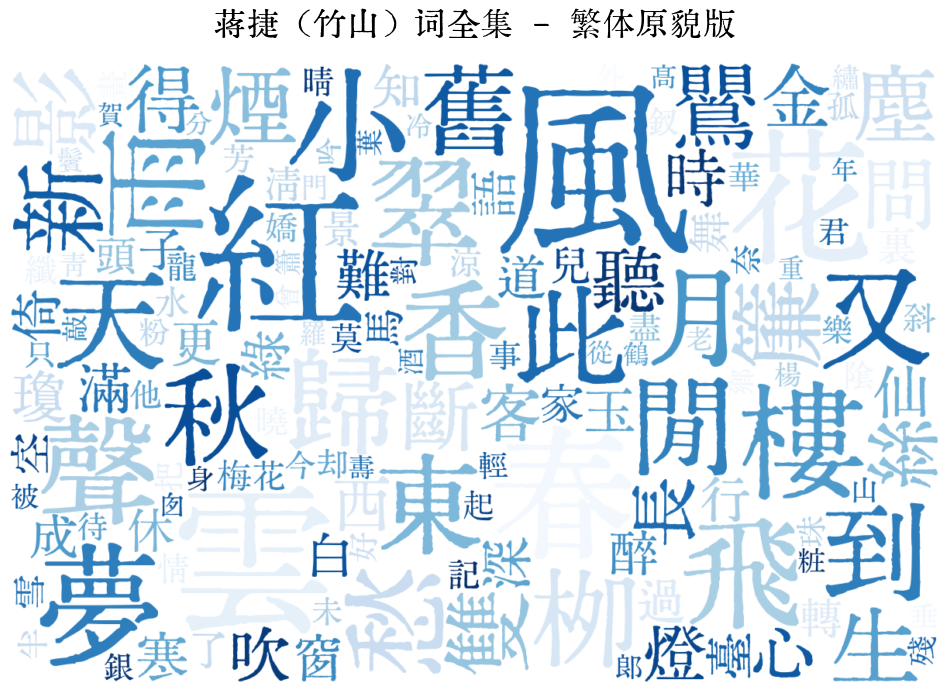

In [ ]:
import pandas as pd
import jiayan
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties # 核心修复工具
from collections import Counter
import os

# ==========================================
# 1. 准备工作：确保字体和模型都在
# ==========================================

# A. 检查/下载中文字体 (SimHei 支持繁体显示)
font_file = "/content/sample_data/song.ttf"
if not os.path.exists(font_file):
    print("⚠️ 正在下载字体文件...")
    os.system("wget https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip && unzip -o simhei.zip && rm simhei.zip")

# B. 检查甲言模型
model_path = "/content/jiayan.klm" # 如果你在本地，改成 'jiayan.klm'
if not os.path.exists(model_path):
    # 尝试在当前目录找
    if os.path.exists("jiayan.klm"):
        model_path = "jiayan.klm"
    else:
        print("❌ 找不到 jiayan.klm！请确保你已经上传了模型文件。")
        # 这里的 raise 会强制停止程序，防止后面报错
        raise FileNotFoundError("jiayan.klm missing")

# ==========================================
# 2. 彻底解决 Matplotlib 乱码
# ==========================================
# 创建一个字体属性对象，专门给标题用
title_font = FontProperties(fname=font_file, size=24)

# ==========================================
# 3. 读取数据 & 初始化
# ==========================================
print("正在加载数据和模型...")
df = pd.read_excel('/content/sample_data/zhushan.xlsx', keep_default_na=False)

# 构造全文列
if 'full_text' not in df.columns:
    df['full_text'] = df['title'].astype(str) + " " + df['content'].astype(str)

# 加载分词器
lm = jiayan.load_lm(model_path)
segmenter = jiayan.CharHMMTokenizer(lm)

# ==========================================
# 4. 繁体分词 (无 OpenCC)
# ==========================================
# 停用词表 (保留繁体写法，因为我们不转简体了)
stop_words = set([
    "，", "。", "？", "！", "、", "；", "：", "·", "〈", "〉", "《", "》", "\n", " ", "　",
    "之", "乎", "者", "也", "兮", "焉", "矣", "哉", "夫", "盖", "耳", "其",
    "于", "與", "以", "而", "則", "乃", "若", "且", "為", "所", "因", # 注意：這裡用了繁體 '與', '為', '則'
    "不", "無", "有", "去", "來", "看", "見", "作", "似", "如", "是", "在",
    "這", "那", "甚", "個", "些", "處", "裡", "邊", "度", "許", "般", "向", "但",
    "我", "吾", "人", "誰", "何", "幾", "怎", "卻", "便", "總", "還", "正", "自",
    "一", "二", "三", "十", "千", "萬", "上", "中", "下", "後", "前", "日"
])

print("正在分词 (保留繁体)...")
final_words = []

for text in df['full_text'].tolist():
    # 只清洗非汉字，保留繁体原文
    clean_text = re.sub(r"[^\u4e00-\u9fa5]", "", text)

    # 甲言分词
    words = segmenter.tokenize(clean_text)

    for w in words:
        # 过滤
        if w not in stop_words and len(w) >= 1: # 如果只想看双字词，改成 len(w) > 1
            final_words.append(w)

# 统计词频
word_counts = Counter(final_words)
print("【Top 15 高频词】:", word_counts.most_common(15))

# ==========================================
# 5. 绘图
# ==========================================
print("正在绘制词云...")

wc = WordCloud(
    font_path=font_file,  # 1. 传给 WordCloud，保证云里的字正常
    width=1200,
    height=800,
    background_color='white',
    max_words=150,
    max_font_size=250,
    random_state=42,
    colormap='Blues'
).generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

# 2. 传给 Title，保证标题正常 (这是之前报错的关键)
plt.title("蒋捷（竹山）词全集 - 繁体原貌版", fontproperties=title_font, pad=20)

plt.show()

正在加载数据和模型...
正在分词并计算原始频次...
正在分词 (保留繁体)...
正在应用权重算法 (双字权重 x 7)...
【加权后 Top 15 得分词】: [('梅花', 98), ('風', 86), ('紅', 68), ('雲', 63), ('一片', 63), ('花', 53), ('春', 51), ('芙容', 49), ('夢', 42), ('秋夜', 42), ('樓', 39), ('多少', 35), ('小', 35), ('飛', 35), ('盈盈', 35)]


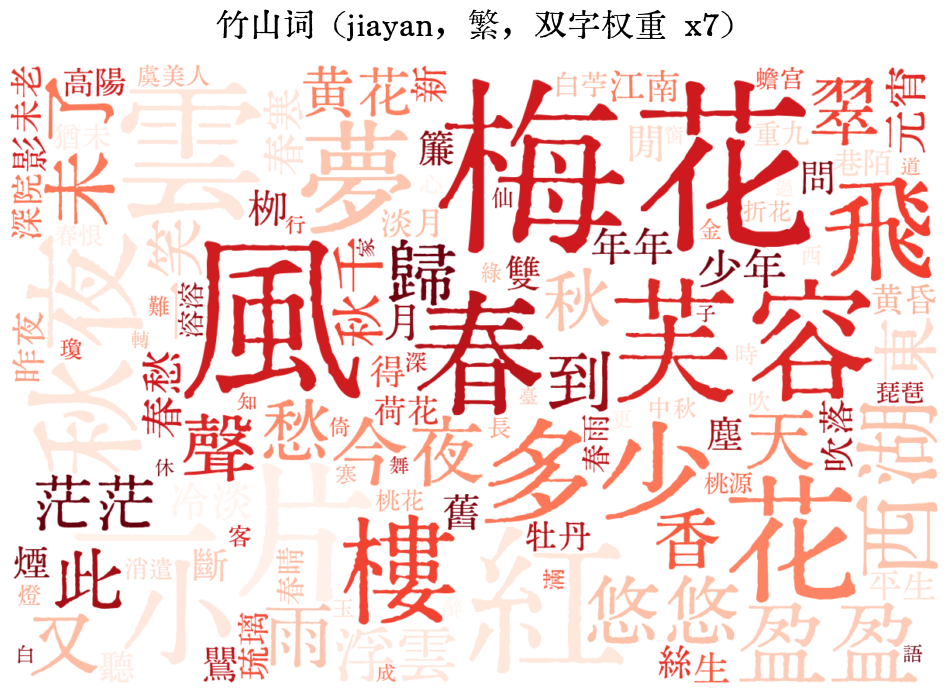

In [ ]:
import pandas as pd
import jiayan
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties # 核心修复工具
from collections import Counter
import os


MULTI_CHAR_BOOST = 7
# ==========================================
# 1. 准备工作：确保字体和模型都在
# ==========================================

# A. 检查/下载中文字体 (SimHei 支持繁体显示)
font_file = "/content/sample_data/song.ttf"
if not os.path.exists(font_file):
    print("⚠️ 正在下载字体文件...")
    os.system("wget https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip && unzip -o simhei.zip && rm simhei.zip")

# B. 检查甲言模型
model_path = "/content/jiayan.klm" # 如果你在本地，改成 'jiayan.klm'
if not os.path.exists(model_path):
    # 尝试在当前目录找
    if os.path.exists("jiayan.klm"):
        model_path = "jiayan.klm"
    else:
        print("❌ 找不到 jiayan.klm！请确保你已经上传了模型文件。")
        # 这里的 raise 会强制停止程序，防止后面报错
        raise FileNotFoundError("jiayan.klm missing")

# ==========================================
# 2. 彻底解决 Matplotlib 乱码
# ==========================================
# 创建一个字体属性对象，专门给标题用
title_font = FontProperties(fname=font_file, size=24)

# ==========================================
# 3. 读取数据 & 初始化
# ==========================================
print("正在加载数据和模型...")
df = pd.read_excel('/content/sample_data/zhushan.xlsx', keep_default_na=False)

# 构造全文列
if 'full_text' not in df.columns:
    df['full_text'] = df['content'].astype(str)

# 加载分词器
lm = jiayan.load_lm(model_path)
segmenter = jiayan.CharHMMTokenizer(lm)

print("正在分词并计算原始频次...")
all_tokens = []
# ==========================================
# 4. 繁体分词 (无 OpenCC)
# ==========================================
# 停用词表 (保留繁体写法，因为我们不转简体了)
stop_words = set([
    "，", "。", "？", "！", "、", "；", "：", "·", "〈", "〉", "《", "》", "\n", " ", "　",
    "之", "乎", "者", "也", "兮", "焉", "矣", "哉", "夫", "盖", "耳", "其",
    "于", "與", "以", "而", "則", "乃", "若", "且", "為", "所", "因", # 注意：這裡用了繁體 '與', '為', '則'
    "不", "無", "有", "去", "來", "看", "見", "作", "似", "如", "是", "在",
    "這", "那", "甚", "個", "些", "處", "裡", "邊", "度", "許", "般", "向", "但",
    "我", "吾", "人", "誰", "何", "幾", "怎", "卻", "便", "總", "還", "正", "自",
    "一", "二", "三", "十", "千", "萬", "上", "中", "下", "後", "前", "日"
])

print("正在分词 (保留繁体)...")
final_words = []

for text in df['full_text'].tolist():
    clean_text = re.sub(r"[^\u4e00-\u9fa5]", "", text)
    words = segmenter.tokenize(clean_text)

    for w in words:
        if w not in stop_words:
            all_tokens.append(w)

# 此时得到了原始的计数，例如 {'聽雨': 10, '雨': 50}
raw_counts = Counter(all_tokens)

# ==========================================
# 3. 【核心代码】加权算法遍历
# ==========================================
print(f"正在应用权重算法 (双字权重 x {MULTI_CHAR_BOOST})...")

weighted_scores = {}

for word, count in raw_counts.items():
    # 逻辑判断
    if len(word) >= 2:
        # 双字/多字词：人为放大权重
        weighted_scores[word] = count * MULTI_CHAR_BOOST
    else:
        # 单字词：保持原始权重
        weighted_scores[word] = count

# 打印一下看看效果（按分数排序）
# 你会发现“听雨”的分数可能超过了“愁”
sorted_scores = sorted(weighted_scores.items(), key=lambda x: x[1], reverse=True)
print("【加权后 Top 15 得分词】:", sorted_scores[:15])

# ==========================================
# 4. 生成词云 (注意方法变化)
# ==========================================
# 必须使用 generate_from_frequencies 接受我们需要算好的分数
wc = WordCloud(
    font_path=font_path, # 记得定义 font_path
    width=1200,
    height=800,
    background_color='white',
    max_words=120,
    max_font_size=250,
    random_state=42,
    colormap='Reds'
).generate_from_frequencies(weighted_scores) # <--- 传入算分后的字典

plt.figure(figsize=(12, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title(f"竹山词 (jiayan，繁，双字权重 x{MULTI_CHAR_BOOST})",  fontproperties=title_font, pad=20)
plt.show()

✅ 成功读取 Excel，共 96 首词。
正在进行繁简转换 (OpenCC)...
预览转换后的正文前3行：
0    𣺌𣺌啼鸦了亘鱼天寒生峭屿五湖秋晓竹几一镫人做梦嘶马谁行古道起搔首窥星多少月有微黄篱无影挂牵牛...
1    雁屿晴岚薄倚层屏千树髙低粉纤红弱云隘东风藏不尽吹艳生香万壑又散入汀蘅洲药扰扰囱囱尘土面看歌鸎...
2    浪涌孤亭起是当年蓬莱顶上海风飘坠帝遣江神长守䕶八柱蛟龙纒尾鬬吐出寒烟寒雨昨夜鲸翻神轴动巻雕翚...
Name: simp_text, dtype: object

正在使用 Jieba 分词...
分词完成，提取到 3196 个独立词汇。
正在应用加权算法 (双字权重 x 1)...
【Top 15 加权后高分词】: [('又', 31), ('月', 27), ('栁', 24), ('鸎', 20), ('翠', 19), ('把', 18), ('他', 17), ('云', 16), ('春', 15), ('倚', 15), ('花', 15), ('更', 14), ('红', 14), ('小', 13), ('西风', 12)]

正在绘图...


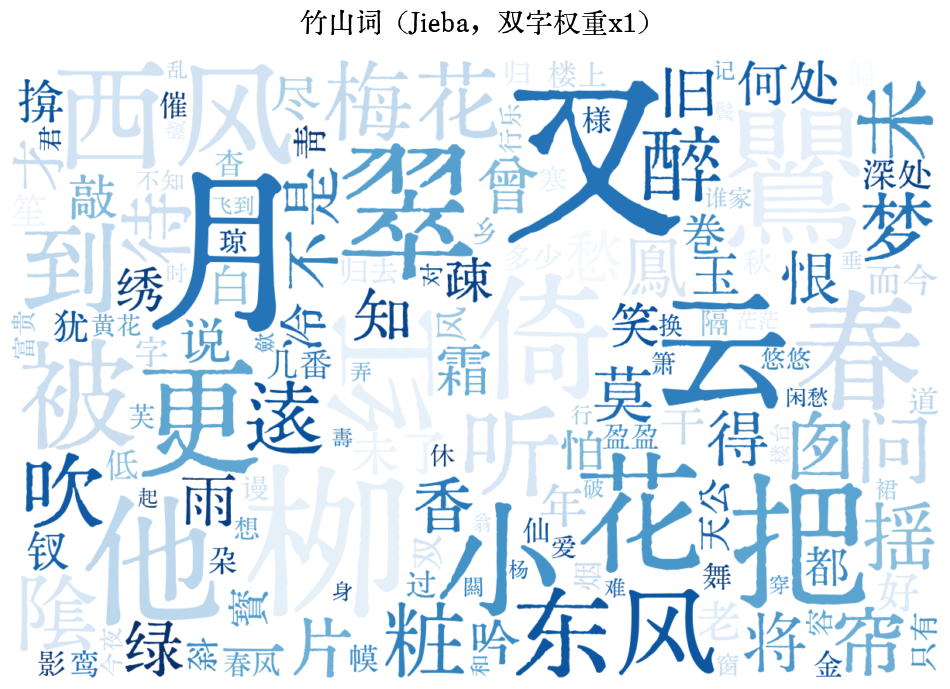

In [ ]:
import pandas as pd
import jieba
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from opencc import OpenCC
import os
from matplotlib.font_manager import FontProperties

# ==========================================
# 0. 参数配置
# ==========================================
font_path = "/content/sample_data/song.ttf"    # 你的字体路径
file_path = '/content/sample_data/zhushan.xlsx' # 你的Excel路径

# 双字词加权倍数 (8倍：让双字词比如"芭蕉"比单字"雨"更容易变大)
MULTI_CHAR_BOOST = 1

# 设置 Matplotlib 字体 (防止标题乱码)
if not os.path.exists(font_path):
    print(f"⚠️ 警告：找不到字体 {font_path}，请确认路径！")
my_font = FontProperties(fname=font_path, size=20)

# ==========================================
# 1. 读取数据 (只读 Content)
# ==========================================
if not os.path.exists(file_path):
    print(f"❌ 找不到 Excel 文件: {file_path}")
else:
    df = pd.read_excel(file_path, keep_default_na=False)
    print(f"✅ 成功读取 Excel，共 {len(df)} 首词。")

    # 【关键】只提取 'content' 列，忽略词牌和标题
    df['text_for_analysis'] = df['content'].astype(str)

    # ==========================================
    # 2. 繁体转简体 (OpenCC)
    # ==========================================
    print("正在进行繁简转换 (OpenCC)...")
    cc = OpenCC('t2s') # Traditional -> Simplified
    df['simp_text'] = df['text_for_analysis'].apply(lambda x: cc.convert(x))

    print("预览转换后的正文前3行：")
    print(df['simp_text'].head(3))

    # ==========================================
    # 3. Jieba 分词 & 停用词过滤
    # ==========================================
    print("\n正在使用 Jieba 分词...")

    stop_words = set([
        "，", "。", "？", "！", "、", "；", "：", "·", "〈", "〉", "《", "》", "\n", " ", "　",
        "之", "乎", "者", "也", "兮", "焉", "矣", "哉", "夫", "盖", "耳", "其",
        "于", "与", "以", "而", "则", "乃", "若", "且", "为", "所", "因",
        "不", "无", "有", "去", "来", "看", "见", "作", "似", "如", "是", "在",
        "这", "那", "甚", "个", "些", "处", "里", "边", "度", "许", "般", "向", "但",
        "我", "吾", "人", "谁", "何", "几", "怎", "却", "便", "总", "还", "正", "自",
        "一", "二", "三", "十", "千", "万", "上", "中", "下", "后", "前", "日",
        "了", "着", "儿" # 结巴分词有时候会分出这些现代虚词，加进去屏蔽
    ])

    # 1. 拼接所有文本
    full_text = " ".join(df['simp_text'].tolist())

    # 2. 清洗非汉字 (只留中文)
    clean_text = re.sub(r"[^\u4e00-\u9fa5]", "", full_text)

    # 3. 结巴精确模式分词
    words = jieba.lcut(clean_text)

    # 4. 过滤收集
    all_tokens = []
    for w in words:
        w = w.strip()
        if w not in stop_words and len(w) >= 1:
            all_tokens.append(w)

    # 统计原始词频
    raw_counts = Counter(all_tokens)
    print(f"分词完成，提取到 {len(raw_counts)} 个独立词汇。")

    # ==========================================
    # 4. 加权计算 (核心算法)
    # ==========================================
    print(f"正在应用加权算法 (双字权重 x {MULTI_CHAR_BOOST})...")

    weighted_scores = {}
    for word, count in raw_counts.items():
        if len(word) > 1:
            # 双字词：原始次数 * 8 (或者你设定的倍数)
            weighted_scores[word] = count * MULTI_CHAR_BOOST
        else:
            # 单字词：原始次数 * 1
            weighted_scores[word] = count

    # 打印 Top 15 看看效果
    print("【Top 15 加权后高分词】:", sorted(weighted_scores.items(), key=lambda x:x[1], reverse=True)[:15])

    # ==========================================
    # 5. 绘制词云
    # ==========================================
    if weighted_scores:
        print("\n正在绘图...")
        wc = WordCloud(
            font_path=font_path,
            width=1200,
            height=800,
            background_color='white',
            max_words=150,
            max_font_size=250,
            random_state=42,
            colormap='Blues' # 蓝绿色调
        ).generate_from_frequencies(weighted_scores)

        plt.figure(figsize=(12, 10))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title("竹山词 (Jieba，双字权重x1)", fontproperties=my_font, pad=20)
        plt.show()
    else:
        print("❌ 结果为空，无法绘图。")

数据准备完毕，共 8569 个汉字。
正在挖掘 [1, 2, 3, 4] 字长的词语...
正在统计词频并筛选...

挖掘出 877 个词语。
【Top 20 高频挖掘词】:
花: 93次
风: 83次
春: 70次
一: 69次
红: 66次
云: 66次
人: 62次
无: 47次
翠: 45次
有: 43次
月: 42次
小: 42次
来: 42次
天: 39次
梦: 39次
愁: 38次
处: 38次
秋: 37次
到: 36次
谁: 35次
香: 35次
飞: 35次

正在绘制词云...


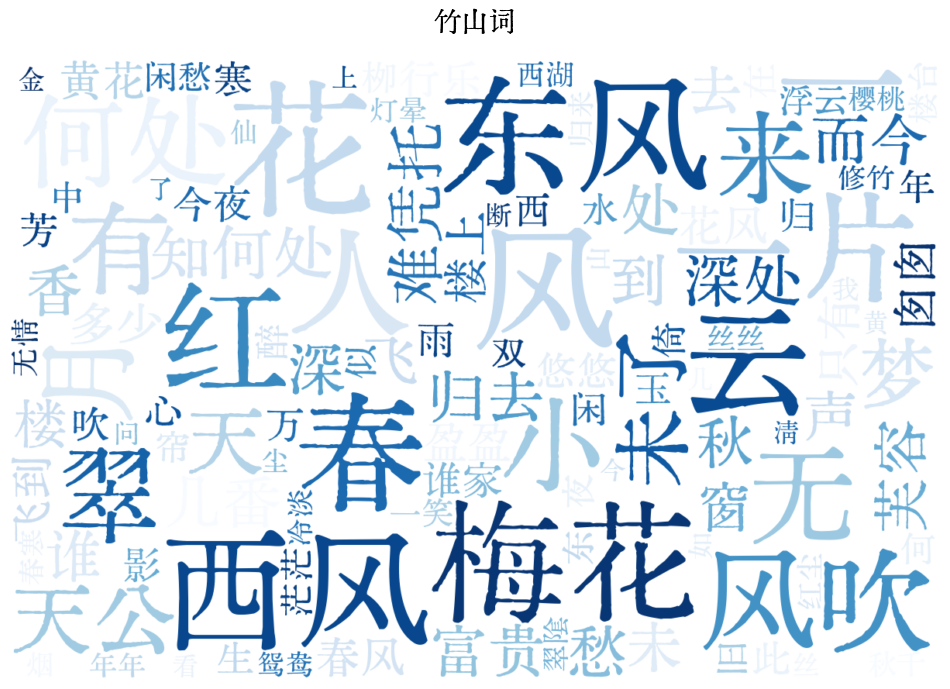

In [56]:
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from opencc import OpenCC
import os
from matplotlib.font_manager import FontProperties

# ==========================================
# 0. 配置参数
# ==========================================
font_path = "/content/drive/MyDrive/Colab_Notebooks/zhushan/song.ttf"  # 你的字体
file_path = "/content/drive/MyDrive/Colab_Notebooks/zhushan/zhushan.xlsx"

# 【核心阈值】只有出现次数 >= 3 次的，才被认定为“词语”
# 设为 3 是个经验值，能过滤掉绝大多数偶然拼凑的假词
MIN_FREQUENCY = 3

# 我们要挖掘多长的词？(2字到4字)
# 宋词里超过4字的固定词语极少，没必要算5字
NGRAM_RANGE = [1, 2, 3, 4]

if not os.path.exists(font_path):
    print(f"⚠️ 警告：找不到字体 {font_path}")
my_font = FontProperties(fname=font_path, size=20)

# ==========================================
# 1. 读取 & 清洗数据
# ==========================================
if not os.path.exists(file_path):
    print("❌ 找不到 Excel 文件")
else:
    df = pd.read_excel(file_path, keep_default_na=False)

    # 繁简转换
    cc = OpenCC('t2s')
    full_text = " ".join(df['content'].astype(str).tolist())
    full_text = cc.convert(full_text)

    # 彻底清洗：只保留汉字
    # 这一点至关重要，防止跨句子的字被连在一起（比如上一句结尾和下一句开头）
    # 但为了滑动窗口不被打断，我们可以先不替换成空格，而是替换成一个特殊符号，或者直接去掉标点
    # 这里为了简单，我们直接去掉标点，虽然会带来极少量的“跨句假词”，但会被频率阈值过滤掉
    clean_text = re.sub(r"[^\u4e00-\u9fa5]", "", full_text)

    print(f"数据准备完毕，共 {len(clean_text)} 个汉字。")

    # ==========================================
    # 2. 定义“垃圾字符” (Stop Characters)
    # ==========================================
    # 如果一个词里包含了这些虚词，那它肯定不是我们想要的“意象词”
    # 比如 "之年" (含之)、 "我看" (含我)
    stop_chars = set([
        "之", "乎","是","不","也","又"
    ])

    # ==========================================
    # 3. 【算法核心】多窗口滑动遍历 (2,3,4字)
    # ==========================================
    print(f"正在挖掘 {NGRAM_RANGE} 字长的词语...")

    all_candidates = []

    # 遍历我们想要寻找的词长 (2, 3, 4)
    for length in NGRAM_RANGE:
        # 滑动窗口遍历
        for i in range(len(clean_text) - length + 1):
            # 1. 切片：取出当前窗口的词
            chunk = clean_text[i : i + length]

            # 2. 垃圾检测：如果词里包含任何一个垃圾字，直接丢弃
            # 这一步非常狠，能杀掉 90% 的无效组合（如 "雨之"、"我看"）
            has_stop_char = False
            for char in chunk:
                if char in stop_chars:
                    has_stop_char = True
                    break

            if has_stop_char:
                continue

            # 3. 存入候选列表
            all_candidates.append(chunk)

    # ==========================================
    # 4. 统计与筛选
    # ==========================================
    print("正在统计词频并筛选...")
    counter = Counter(all_candidates)

    final_words = {}
    for word, count in counter.items():
        # 只有出现次数达标的，才算作“词”
        if count >= MIN_FREQUENCY:
            # 加分策略：字数越多的词，权重稍微给高一点点
            # 比如 4字词 * 1.5，让它们在词云里更容易被看见
            weight = count * (1 + (len(word)-1) * (len(word)-1) + (len(word)-1) * 4)
            final_words[word] = weight

    # 打印结果看看
    print(f"\n挖掘出 {len(final_words)} 个词语。")
    print("【Top 20 高频挖掘词】:")
    # 按原始频率排序展示
    top_show = sorted(counter.items(), key=lambda x:x[1], reverse=True)
    for w, c in top_show:
        if w in final_words: # 只显示我们保留的
            print(f"{w}: {c}次")
            if len(top_show) > 20 and top_show.index((w,c)) > 20: break

    # ==========================================
    # 5. 绘图
    # ==========================================
    if final_words:
        print("\n正在绘制词云...")
        wc = WordCloud(
            font_path=font_path,
            width=1200,
            height=800,
            background_color='white',
            max_words=120,
            max_font_size=200,
            random_state=42,
            colormap='Blues_r' # 绿色到蓝色，很适合宋词
        ).generate_from_frequencies(final_words)

        plt.figure(figsize=(12, 10))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"竹山词", fontproperties=my_font, pad=20)
        plt.show()
    else:
        print("❌ 没挖到词！可能是 MIN_FREQUENCY 设太高了，试着改成 2。")

# 窗函数法
$H_d$
# 频率抽样法
FIR滤波器

模拟滤波器-带通数字滤波器

数字滤波器的技术指标

## IIR数字滤波器
#### 冲激响应不变法
对$h_a(t)$进行等间隔抽样、
$H_a(s)$展开为部分分式变换-›得到
z变换

转换会发生混叠现象-›不适合设计高通和带阻滤波器 极坐标变换的关系


### 双线性变换
$s = \frac{2}{T}$
一一对应，不会出现多对一的情况
根据原型

截止频率为1

流程

1.数字到模拟

$Ω_c=2/T tan($

缺点：没有线性相位

#### 巴特沃斯滤波器

#### 切比雪夫滤波器
滤波器阶数
原型-›低通/高通
表达式


Vs = /omega

IIR非线性相位
